Este notebook es para la sistematización de la información usando un diccionario

In [1]:
# se importan las librerias a utilizar
import spacy
import pandas as pd
import numpy as np
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

import funciones as f

In [2]:
# se carga el modelo NLP en espanol
nlp = spacy.load('es_core_news_md')

In [3]:
# se importa la informacion del archivo de excel
event = 'taller'
df = pd.read_excel('info.xlsx', sheet_name=event)

# se establecen las preguntas que se van a usar y una variable para guardar datos
preguntas = ['P1', 'P2', 'P3']
expanded_responses = {}

In [4]:
# se procesa la informacion y se guardan los resultados del analisis del texto
for pregunta in preguntas:
    if pregunta in df.columns:
        ans = df[['Sector', pregunta]].dropna()
        ans['res'] = ans[pregunta].apply(lambda x: f.extract_keywords(x, f.dictionary))
        expanded_resp = f.expand_ans(ans, 'res').drop('res', axis=1)
        expanded_responses[pregunta] = expanded_resp

In [5]:
totales = {}
for pregunta in preguntas:
    resp = expanded_responses.get(pregunta)
    result = f.results(resp) if resp is not None else None
    if resp is not None and result is not None:
        totales[pregunta] = pd.concat([resp, result])

In [6]:
radar_data = []
for pregunta in preguntas:
    result = f.results(expanded_responses.get(pregunta)) if expanded_responses.get(pregunta) is not None else None
    if result is not None:
        result_no_sector = result.drop(['Sector', pregunta], axis=1)
        radar_data.append(result_no_sector.iloc[-1])  # Append the summary row
        f.graf_rad(result_no_sector, f'{pregunta}.png')

c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.append(values, values[0])
c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.append(values, values[0])
c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

In [7]:
total = pd.concat(radar_data, axis=1).T if radar_data else pd.DataFrame()
suma = pd.DataFrame(total.sum()).T if not total.empty else pd.DataFrame()
total = pd.concat([total, suma]).reset_index(drop=True)

c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.append(values, values[0])


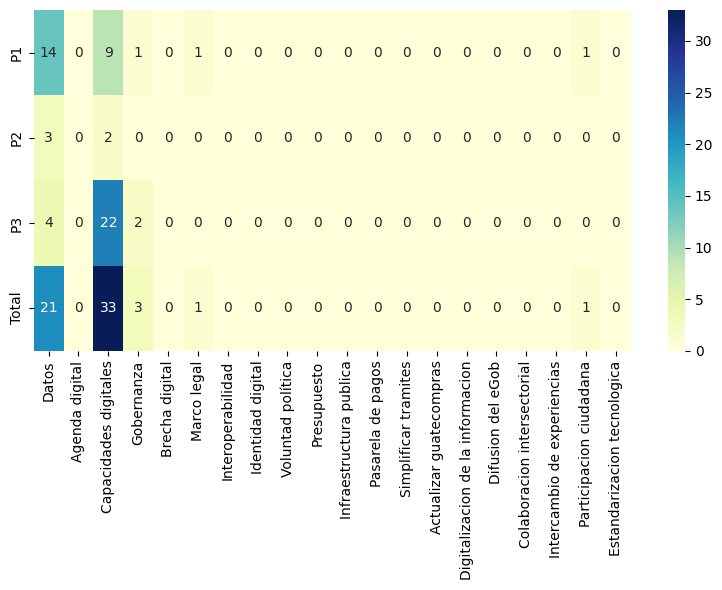

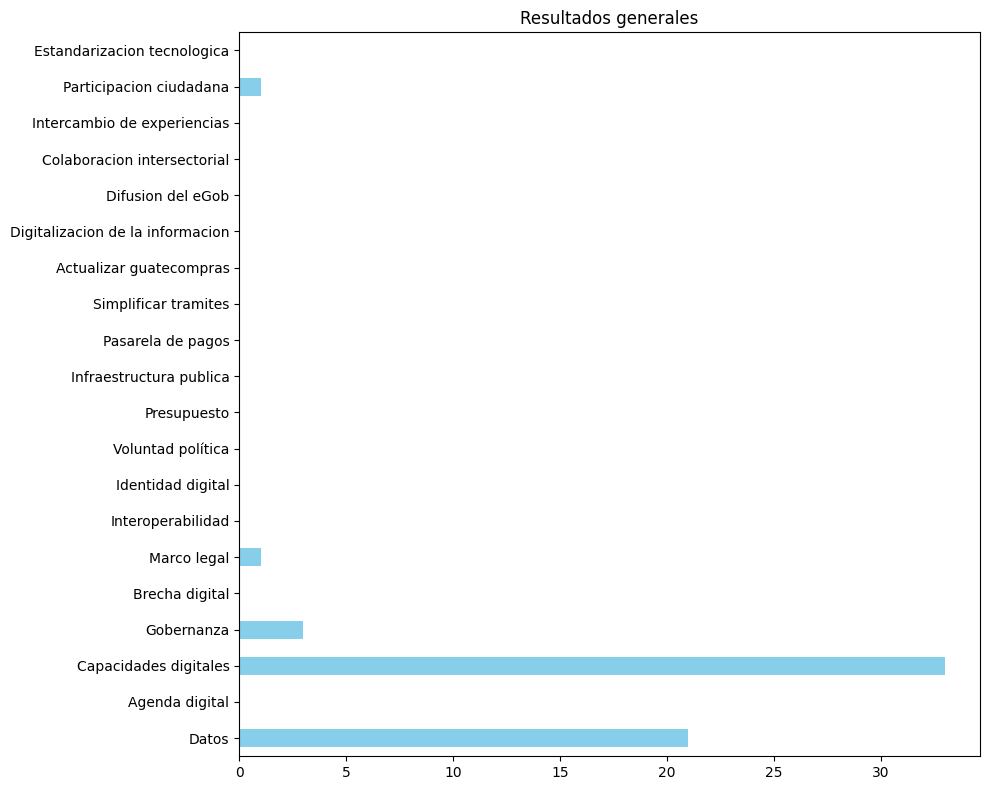

In [8]:
f.graf_rad(total, 'total.png')
f.histograma(total, 'totalhist.png')
f.heatmap(total, 'totalhm.png')

In [9]:
file_name = f'resultados/{event}.xlsx'
with pd.ExcelWriter(file_name, engine='openpyxl') as writer:
    for idx, (pregunta, data) in enumerate(totales.items(), start=1):
        sheet_name = f'Sheet{idx}'
        data.to_excel(writer, sheet_name=sheet_name, index=False)

        worksheet = writer.sheets[sheet_name]
        img = Image(f'{pregunta}.png')
        img.anchor = 'X2'
        worksheet.add_image(img)

    total.to_excel(writer, sheet_name='Sheet4', index=False)
    worksheet = writer.sheets['Sheet4']
    img_total = Image('total.png')
    img_total.anchor = 'A8'
    worksheet.add_image(img_total)
    
    img_hist = Image('totalhist.png')
    img_hist.anchor = 'K8'
    worksheet.add_image(img_hist)
    
    img_heatmap = Image('totalhm.png')
    img_heatmap.anchor = 'W8'
    worksheet.add_image(img_heatmap)